# Prison Break Data Analysis in Python

## 1. Introduction

In this project we will perform analysis of Prison Break Data in Python. We will be getting our data straight from the Wikipedia article, so it's possible that the result of the solution differs from what we get, as the Wikipedia article can be updated.

This data includes prisoner escapes where a helicopter was used in an attempt to free prisoners from a place of internment, a prison or correctional facility.

We have six columns, which are all self-descriptive. In this project, we'll answer the following questions:

* In which year did the most helicopter prison break attempts occur?
* In which countries do the most attempted helicopter prison escapes occur?
* What is the Success and Failure Rate of Prison Break attempts?
* What is the Monthly and Seasonal frequency of Prison Break attempts?

### 1.1 Get Data

To begin our analysis, we will load the data from the above-mentioned link using `Pandas` library in Python. To load data, we will make use of `pandas.read_html`.

In [2]:
import pandas as pd
url='https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts'
prison=pd.read_html(url)
prison=prison[1] #To remove arbitrary header column

print(prison.head())

                Date                                   Prison name  \
0    August 19, 1971                         Santa Martha Acatitla   
1   October 31, 1973                         Mountjoy Jail, Dublin   
2       May 24, 1978  United States Penitentiary, Marion, Illinois   
3  February 27, 1981        Fleury-Mérogis, Essonne, Ile de France   
4        May 7, 1981               Orsainville Prison, Quebec City   

         Country Succeeded                                         Escapee(s)  \
0         Mexico       Yes  Joel David Kaplan Carlos Antonio Contreras Castro   
1        Ireland       Yes              JB O'Hagan Seamus Twomey Kevin Mallon   
2  United States        No  Garrett Brock Trapnell Martin Joseph McNally J...   
3         France       Yes                       Gérard Dupré Daniel Beaumont   
4         Canada        No  Marina Paquet (hijacker) Giles Arseneault (pri...   

                                             Details  
0  Kaplan was a New York businessman 

### 1.2 Removing the Details

Since the information provided in `Details` and `Escapee(s)` columns is not required for the purposes of our project, therefore we will remove this column.

In [3]:
prison=prison.drop(columns=['Details','Escapee(s)'])

In [4]:
from IPython.core.display import display

display(prison.head().style.hide())

C:\Users\Vipul_Sharma\AppData\Local\Temp\ipykernel_16332\1046795630.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


Date,Prison name,Country,Succeeded
"August 19, 1971",Santa Martha Acatitla,Mexico,Yes
"October 31, 1973","Mountjoy Jail, Dublin",Ireland,Yes
"May 24, 1978","United States Penitentiary, Marion, Illinois",United States,No
"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes
"May 7, 1981","Orsainville Prison, Quebec City",Canada,No


### 1.3 Extracting the Year

Dates in the `Date` column of our Dataframe are given in a `mmmm dd, yyyy` format. We will extract year from this column as the rest of the date information is not necessary for this segment of analysis. 

In [5]:
prison["Year"]=prison["Date"].str.strip()
prison["Year"]=prison["Year"].str[-4:]
prison["Year"]=pd.to_datetime(prison["Year"],format="%Y").dt.year
prison["Attempt"]=1 #Making a flag for attempts to use for subsequent analysis 
display(prison.head().style.hide())

Date,Prison name,Country,Succeeded,Year,Attempt
"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,1971,1
"October 31, 1973","Mountjoy Jail, Dublin",Ireland,Yes,1973,1
"May 24, 1978","United States Penitentiary, Marion, Illinois",United States,No,1978,1
"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,1981,1
"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,1981,1


## 2. Attempts Per Year

We can now determine how many attempts there were in each year and answer one of our starting questions:

> "In which year did the most attempts at breaking out of prison with a helicopter occur?"

To do this, we will create another dataframe `df_escapes` where we would calculate the number of attempts in each year. This can be achieved by grouping the values in the `prison` dataframe by `Year` Column.



In [6]:
import numpy as np

max_year=prison["Year"].max()
min_year=prison["Year"].min()
prison1=prison[["Year","Attempt"]].groupby(by="Year").sum()
prison1=prison1.reset_index()

df_escapes=pd.DataFrame(columns=["Year"])
df_escapes["Year"]=np.linspace(min_year,max_year,dtype=int)
df_escapes = df_escapes.merge(prison1, on='Year', how='left').fillna(0)
df_escapes["Attempt"]=df_escapes["Attempt"].astype(int)
df_escapes.columns=["Year","Attempts"]

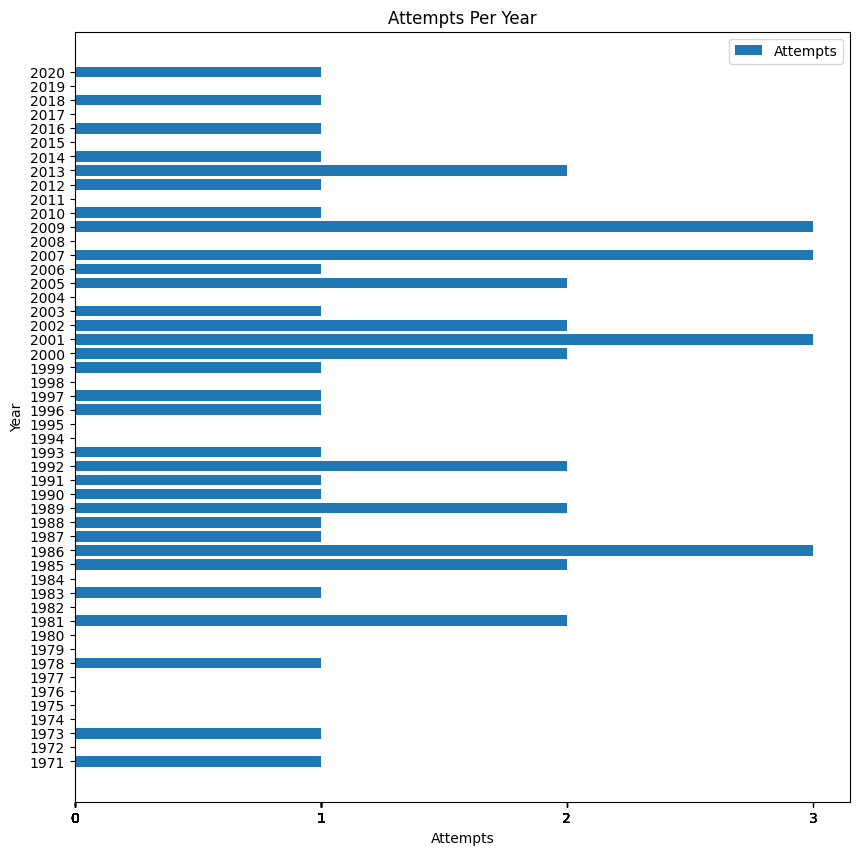

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.barh(df_escapes["Year"],df_escapes["Attempts"],height=0.75,label="Attempts")
plt.yticks(df_escapes["Year"])
plt.xticks(df_escapes["Attempts"])
plt.title("Attempts Per Year")
plt.xlabel("Attempts")
plt.ylabel("Year")
plt.legend()
plt.show()

From the above plot it is evident that the most number of helicopter prison es attempts in any year were 3 and they happened in the years `1986`, `2001`, `2007`, `2009`.

## 3. Attempts by Country

You will now answer another question in this project:

>"In which countries do the most attempted helicopter prison escapes occur?"

We will answer this question by calculating the number of attempts from each country using the `prison` dataframe

In [8]:
df_country=prison["Country"].value_counts()
df_country=df_country.reset_index()
df_country.columns=["Country","Number of Occurences"]
display(df_country.style.hide())

Country,Number of Occurences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Ireland,1
Mexico,1


From the above dataframe, it can be seen that the country with most number of helicopter prison break attempts is `France (15)`

### 3.1 Top 5 Countries with chances of Escape (in %)

In [9]:
df_country_pct=df_country.copy()
df_country_pct.columns=["Country","% Chances"]
tot_attempts=df_country_pct["% Chances"].sum()
df_country_pct["% Chances"]=df_country_pct["% Chances"]*100.0/tot_attempts
df_country_pct["% Chances"]=df_country_pct["% Chances"].round(2)
display(df_country_pct[:5].round(2).style.hide())

Country,% Chances
France,31.250000
United States,16.670000
Canada,8.330000
Greece,8.330000
Belgium,8.330000


Top 5 Countries with highest chances of Helicopter Prison Break are `France (31.25%)`, `United States (16.67%)`, `Canada (8.33%)`, `Greece (8.33%)` and `Belgium (8.33%)`.

## 4. Success vs. Failure Rate

We will now answer the third question in this project

>What is the Success and Failure Rate of Prison Break attempts?

We will now analyze the success and failure rates of helicopter prison breaks.It will be done by first grouping the Prison Break attempts on the basis of the status of their success and then presenting the same in the form of visualization using Pie Chart.

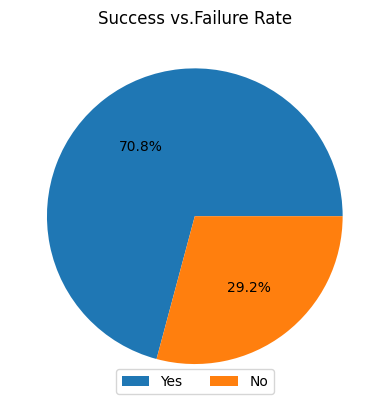

In [10]:
success_counts=prison["Succeeded"].value_counts().reset_index()
success_counts.columns=["Succeeded","Attempts"]
plt.pie(success_counts["Attempts"],autopct='%1.1f%%')
plt.legend(labels=success_counts["Succeeded"],loc=8,ncol=2)
plt.title("Success vs.Failure Rate")
plt.show()

From the above Pie Chart, it can be seen that `70.8%` of the total Prison Break attempts resulted in Success while `29.2%` resulted in Failure. 

## 5. Monthly and Seasonal Analysis of Attempts

In this section of the project we will look forward to answer this question 

> What is the Monthly and Seasonal frequency of Prison Break attempts?

As mentioned above, Dates in the `Date` column of our Dataframe are given in a `mmmm dd, yyyy` format. For the purposes of this segment of analysis we will extract the `Month` from the `Date` and will look into Monthly and Seasonal trends of Prison Escape

### 5.1 Extracting the Month and Quarter

In [11]:
prison["Month"]=prison["Date"].str.strip()
prison["Month"]=prison["Month"].str.extract(r'^([^ ,]+)')
prison["Month"]=pd.to_datetime(prison["Month"], format="%B").dt.strftime('%B') #Month Extraction

prison["Quarter"]=pd.to_datetime(prison["Month"], format="%B").dt.quarter #Quarter Extraction
prison["Quarter"]=prison["Quarter"].astype(str)
prison["Quarter"]="Quarter "+prison["Quarter"]

### 5.2 Attempts by Month

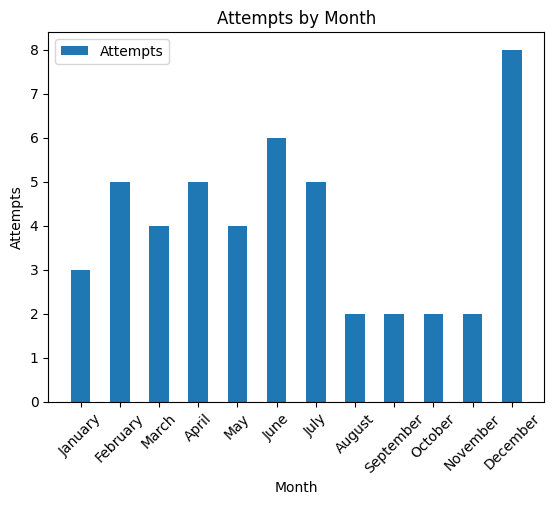

In [12]:
#Month Dataframe
months=["January","February","March","April","May","June","July","August","September","October","November","December"]
df_month=prison["Month"].value_counts()
df_month=df_month.reset_index()
df_month.columns=["Month","Attempts"]
df_month["Month Num"]=pd.to_datetime(df_month["Month"], format="%B").dt.month
df_month.set_index("Month Num",inplace=True)
df_month.sort_index(inplace=True)

#Attempts by Month Visualization
plt.bar(df_month["Month"],df_month["Attempts"], width=0.5,label="Attempts")
plt.legend()
plt.xticks(rotation=45)
plt.title("Attempts by Month")
plt.xlabel("Month")
plt.ylabel("Attempts")
plt.show()

### 5.3 Attempts by Quarter

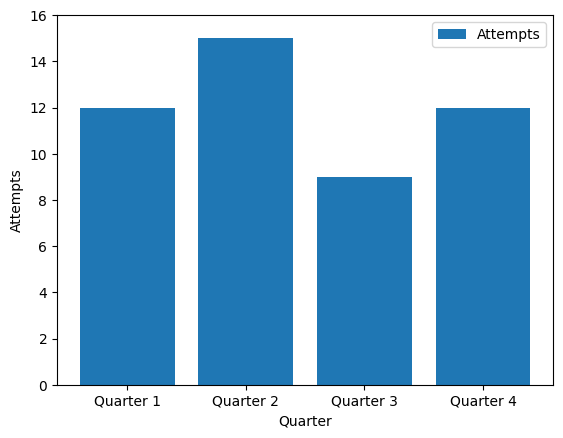

In [13]:
df_quarter = prison["Quarter"].value_counts()
df_quarter.sort_index(inplace=True)
df_quarter=df_quarter.reset_index()
df_quarter.columns=["Quarter","Attempts"]
df_quarter["Quarter"].astype(str)
plt.bar(df_quarter["Quarter"],df_quarter["Attempts"],label="Attempts")
plt.xlabel("Quarter")
plt.ylabel("Attempts")
plt.ylim(0,16)
plt.legend()
plt.show()

Above analysis display the Monthly and Seasonal (Quarterly) frequency of Prison Break attempts. It can be seen that most number of Helicopter Prison Escape attempts happened in the month of `December (8)` and highest seasonal occurence was observed in `Quarter 2 (15)`, which comprises months from April to June. 